In [1]:
!pip install keras

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


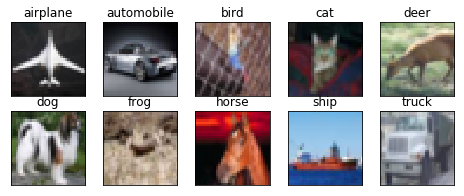

In [30]:

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
#% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


In [28]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2, input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(SeparableConv2D(48, 3, 3))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1),  depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


# model.add(Convolution2D(256, 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_93 (Separab (None, 32, 32, 32)        278       
_________________________________________________________________
batch_normalization_85 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_99 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_94 (Separab (None, 32, 32, 128)       8896      
_________________________________________________________________
batch_normalization_86 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_100 (Activation)  (None, 32, 32, 128)       0         
__________

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 43s 111ms/step - loss: 1.7483 - acc: 0.3579 - val_loss: 1.7764 - val_acc: 0.3828
Epoch 2/50
390/390 [==============================] - 32s 83ms/step - loss: 1.4134 - acc: 0.4875 - val_loss: 1.4206 - val_acc: 0.5141
Epoch 3/50
390/390 [==============================] - 32s 82ms/step - loss: 1.2378 - acc: 0.5562 - val_loss: 1.2874 - val_acc: 0.5844
Epoch 4/50
390/390 [==============================] - 32s 82ms/step - loss: 1.1317 - acc: 0.5964 - val_loss: 1.7716 - val_acc: 0.4917
Epoch 5/50
390/390 [==============================] - 32s 82ms/step - loss: 1.0380 - acc: 0.6317 - val_loss: 1.1234 - val_acc: 0.6321
Epoch 6/50
390/390 [==============================] - 32s 82ms/step - loss: 0.9834 - acc: 0.6563 - val_loss: 1.0913 - val_acc: 0.6379
Epoch 7/50
390/390 [==============================] - 32s 83ms/step - loss: 0.9302 - acc: 0.6741 - val_loss: 0.8825 - val_acc: 0.6954
Epoch 8/50
390/390 [==============================] - 32s 82m

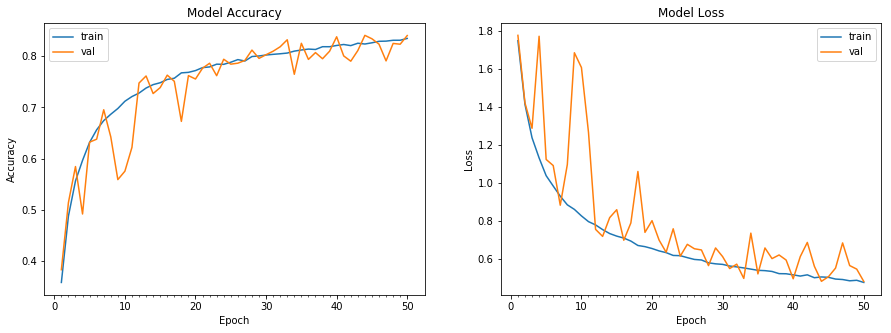

Accuracy on test data is: 84.04


In [29]:
from keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [36]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
#model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
#model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
#model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(1, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_107 (Separa (None, 32, 32, 32)        246       
_________________________________________________________________
depthwise_conv2d_40 (Depthwi (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
batch_normalization_123 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_137 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
depthwise_conv2d_41 (Depthwi (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 64)        4160      
__________

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 42s 108ms/step - loss: 1.8730 - acc: 0.2955 - val_loss: 2.2071 - val_acc: 0.2723
Epoch 2/50
390/390 [==============================] - 27s 70ms/step - loss: 1.4928 - acc: 0.4466 - val_loss: 2.8606 - val_acc: 0.3360
Epoch 3/50
390/390 [==============================] - 27s 70ms/step - loss: 1.3441 - acc: 0.5086 - val_loss: 1.3415 - val_acc: 0.5288
Epoch 4/50
390/390 [==============================] - 27s 70ms/step - loss: 1.2212 - acc: 0.5607 - val_loss: 1.2087 - val_acc: 0.5770
Epoch 5/50
390/390 [==============================] - 27s 70ms/step - loss: 1.1273 - acc: 0.5959 - val_loss: 0.9880 - val_acc: 0.6483
Epoch 6/50
390/390 [==============================] - 27s 70ms/step - loss: 1.0695 - acc: 0.6211 - val_loss: 1.1617 - val_acc: 0.6086
Epoch 7/50
390/390 [==============================] - 27s 70ms/step - loss: 1.0187 - acc: 0.6397 - val_loss: 1.0281 - val_acc: 0.6467
Epoch 8/50
390/390 [==============================] - 27s 70m

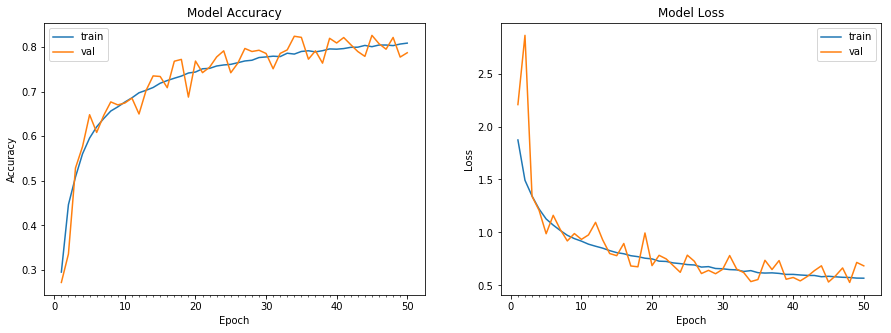

Accuracy on test data is: 78.72


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [38]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
# model.add(Convolution2D(64, 1))
# #model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
# model.add(Convolution2D(64, 1))
# #model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
# model.add(Convolution2D(64, 1))
# #model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(1, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_108 (Separa (None, 32, 32, 32)        246       
_________________________________________________________________
depthwise_conv2d_50 (Depthwi (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
batch_normalization_130 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_147 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
depthwise_conv2d_51 (Depthwi (None, 16, 16, 128)       1152      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 128)       16512     
__________

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 38s 97ms/step - loss: 1.8183 - acc: 0.3176 - val_loss: 1.8890 - val_acc: 0.3507
Epoch 2/50
390/390 [==============================] - 26s 66ms/step - loss: 1.4856 - acc: 0.4540 - val_loss: 1.4240 - val_acc: 0.4859
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 1.3298 - acc: 0.5166 - val_loss: 1.3834 - val_acc: 0.5083
Epoch 4/50
390/390 [==============================] - 26s 67ms/step - loss: 1.2249 - acc: 0.5599 - val_loss: 1.8277 - val_acc: 0.3497
Epoch 5/50
390/390 [==============================] - 26s 67ms/step - loss: 1.1436 - acc: 0.5876 - val_loss: 1.4888 - val_acc: 0.4512
Epoch 6/50
390/390 [==============================] - 26s 68ms/step - loss: 1.0810 - acc: 0.6136 - val_loss: 1.7850 - val_acc: 0.4396
Epoch 7/50
390/390 [==============================] - 26s 68ms/step - loss: 1.0250 - acc: 0.6338 - val_loss: 1.7772 - val_acc: 0.4547
Epoch 8/50
390/390 [==============================] - 26s 68ms

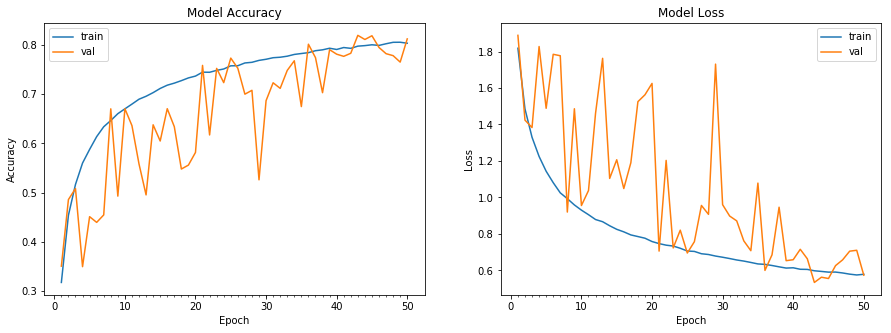

Accuracy on test data is: 81.21


In [39]:
# Compile the model
model.compile(optimizer=Adam(lr=0.002, beta_1 =0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))